In [1]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Get the Weather data from API
api_key = "YOUR_API_KEY"
city = "London,uk"
url = f"http://api.openweathermap.org/data/2.5/forecast?q=London,uk&appid={api_key}"
print(url)
response = requests.get(url)

http://api.openweathermap.org/data/2.5/forecast?q=London,uk&appid=97a0fa32e4d3b09986acf3de7b4b2ea8


In [3]:
if response.status_code == 200:
    data = response.json()
    weather_data = []
    for entry in data['list']:
        dt_str = datetime.utcfromtimestamp(entry['dt']).strftime('%Y-%m-%d %H:%M:%S')
        main = entry['main']
        weather = entry['weather'][0]
        clouds = entry['clouds']
        wind = entry['wind']
        sys = entry['sys']
        
        # Convert temperatures from Kelvin to Celsius
        temp_c = main['temp'] - 273.15
        feels_like_c = main['feels_like'] - 273.15
        temp_min_c = main['temp_min'] - 273.15
        temp_max_c = main['temp_max'] - 273.15
    
        record = {
            'datetime': dt_str,
            'temp_celsius': round(temp_c, 2),
            'feels_like_celsius': round(feels_like_c, 2),
            'temp_min_celsius': round(temp_min_c, 2),
            'temp_max_celsius': round(temp_max_c, 2),
            'pressure': main['pressure'],
            'humidity': main['humidity'],
            'weather_main': weather['main'],
            'weather_description': weather['description'],
            'clouds_all': clouds['all'],
            'wind_speed_m_s': wind['speed'],
            'wind_deg': wind['deg'],
            'visibility_meters': entry.get('visibility', None),
            'pop': entry.get('pop', None),
            'part_of_day': sys.get('pod', None),
            'dt_txt': entry.get('dt_txt', None)
        }
    
        weather_data.append(record)
    df = pd.DataFrame(weather_data)
else:
    print(f"Failed to get data: {response.status_code}")

/var/folders/l2/2z44g3090wbd6sc3nb91dh8c0000gn/T/ipykernel_3367/1972579743.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dt_str = datetime.utcfromtimestamp(entry['dt']).strftime('%Y-%m-%d %H:%M:%S')


In [4]:
df.head()  # Print first two for check

,datetime,temp_celsius,feels_like_celsius,temp_min_celsius,temp_max_celsius,pressure,humidity,weather_main,weather_description,clouds_all,wind_speed_m_s,wind_deg,visibility_meters,pop,part_of_day,dt_txt
0,2025-09-17 12:00:00,16.97,17.02,16.97,17.45,1016,88,Clouds,overcast clouds,100,6.42,221,10000,0.0,d,2025-09-17 12:00:00
1,2025-09-17 15:00:00,17.56,17.62,17.56,18.73,1016,86,Clouds,overcast clouds,100,5.49,231,10000,0.0,d,2025-09-17 15:00:00
2,2025-09-17 18:00:00,17.85,17.94,17.85,18.29,1017,86,Clouds,overcast clouds,100,5.45,227,10000,0.0,d,2025-09-17 18:00:00
3,2025-09-17 21:00:00,18.25,18.45,18.25,18.25,1018,89,Clouds,overcast clouds,100,5.14,235,10000,0.0,n,2025-09-17 21:00:00
4,2025-09-18 00:00:00,17.60,17.79,17.60,17.60,1018,91,Clouds,overcast clouds,93,4.50,235,10000,0.0,n,2025-09-18 00:00:00


In [5]:
# Convert the 'datetime' column to pandas datetime type if not already
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract day and hour into new columns
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [6]:
df_pivot = df.pivot(index='day', columns='hour', values = 'temp_celsius')

In [7]:
avg_temp = df['temp_celsius'].mean()

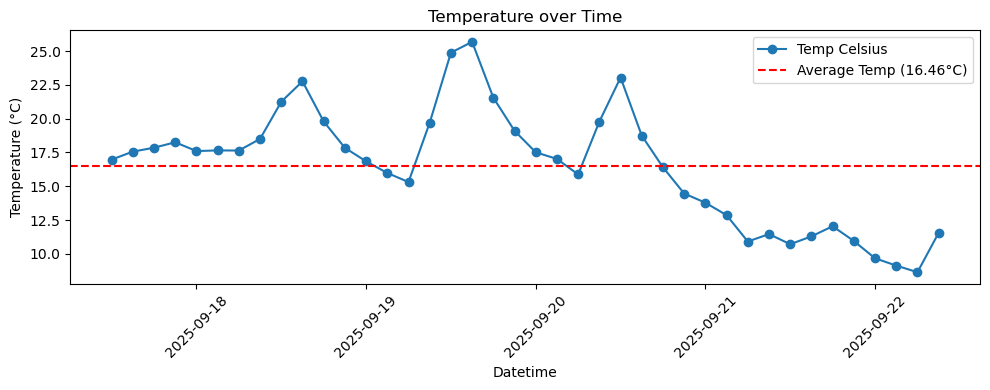

In [8]:
plt.figure(figsize=(10, 4))
plt.plot(df['datetime'], df['temp_celsius'], marker='o', linestyle='-', label='Temp Celsius')

# Calculate average temperature
avg_temp = df['temp_celsius'].mean()

# Add horizontal line for average temperature
plt.axhline(avg_temp, color='red', linestyle='--', label=f'Average Temp ({avg_temp:.2f}°C)')

plt.xlabel('Datetime')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

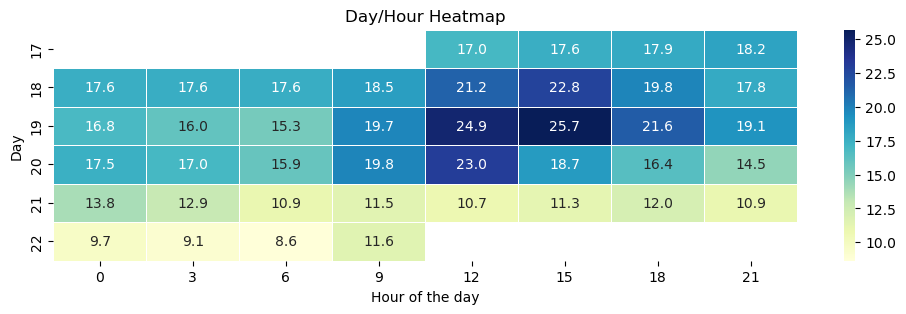

In [9]:
plt.figure(figsize=(12, 3))
sns.heatmap(df_pivot, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Day/Hour Heatmap')
plt.xlabel('Hour of the day')
plt.ylabel('Day')
plt.show()

In [10]:
import sys
print(sys.executable)

/opt/homebrew/Cellar/jupyterlab/4.4.5/libexec/bin/python


In [11]:
import psycopg2
from sqlalchemy import create_engine 

In [30]:
db_username = "YOUR_USERNAME"
db_password = "YOUR_PASSWORD"
db_host = "localhost"
db_port = "5432"
db_name = "postgres"

In [32]:
# Create the SQLAlchemy engine
engine = create_engine(f'postgresql://{db_username}:{db_password}@{db_host}:{db_port}/{db_name}')

In [33]:
df.to_sql('weather', engine, if_exists='append', index=False)

print("DataFrame successfully written to the 'weather' table.")

DataFrame successfully written to the 'weather' table.


In [34]:
engine.dispose()